In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [31]:
df = pd.read_excel("COVID-19 Daily.xlsx")
df.sample(5)

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths
109,2020-06-14,29085.0,5248.0,1986.0,96.0
120,2020-06-25,21041.0,2775.0,2861.0,58.0
62,2020-04-28,8530.0,806.0,192.0,26.0
1,2020-02-27,NaN,NaN,NaN,NaN
81,2020-05-17,13925.0,1974.0,581.0,30.0


In [32]:
df.isnull().sum()

Date                 0
Daily Tests         13
Daily Cases         11
Daily Recoveries    15
Daily Deaths        57
dtype: int64

In [33]:
df.dropna(subset=['Daily Cases', 'Daily Deaths'], inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 13 to 143
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              131 non-null    datetime64[ns]
 1   Daily Tests       131 non-null    float64       
 2   Daily Cases       131 non-null    float64       
 3   Daily Recoveries  131 non-null    float64       
 4   Daily Deaths      131 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 6.1 KB


In [35]:
df.describe()

,Date,Daily Tests,Daily Cases,Daily Recoveries,Daily Deaths
count,131,131.000000,131.000000,131.000000,131.000000
mean,2020-05-14 00:00:00,12918.015267,2011.244275,1557.832061,42.511450
min,2020-03-10 00:00:00,0.000000,1.000000,0.000000,0.000000
25%,2020-04-11 12:00:00,3082.000000,339.000000,88.500000,7.000000
50%,2020-05-14 00:00:00,11931.000000,1579.000000,567.000000,32.000000
75%,2020-06-15 12:00:00,22475.000000,3164.500000,2060.500000,70.500000
max,2020-07-18 00:00:00,31681.000000,6825.000000,14772.000000,153.000000
std,NaN,9691.656908,1825.242534,2430.993229,38.332426


In [36]:
total_tests = df['Daily Tests'].sum()
print(f"Total tests performed till September 01, 2020: {total_tests}")

Total tests performed till September 01, 2020: 1692260.0


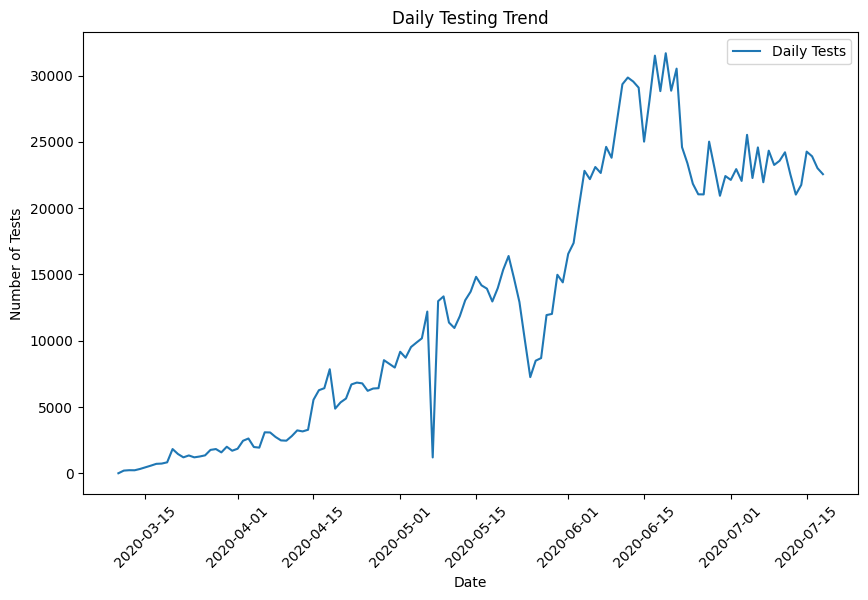

In [37]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Tests'], label='Daily Tests')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Daily Testing Trend')
plt.xticks(rotation=45)
plt.legend()
plt.show()

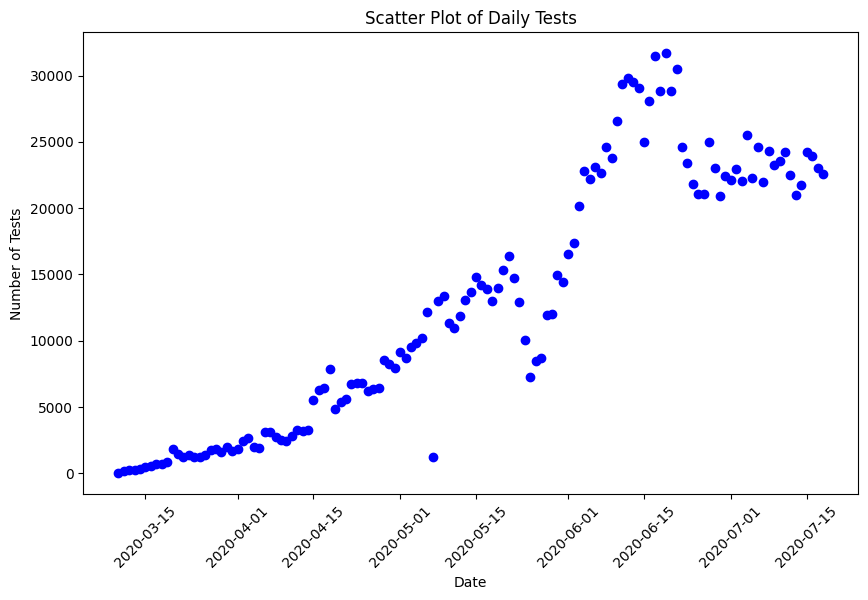

In [38]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Daily Tests'], color='blue')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Scatter Plot of Daily Tests')
plt.xticks(rotation=45)
plt.show()

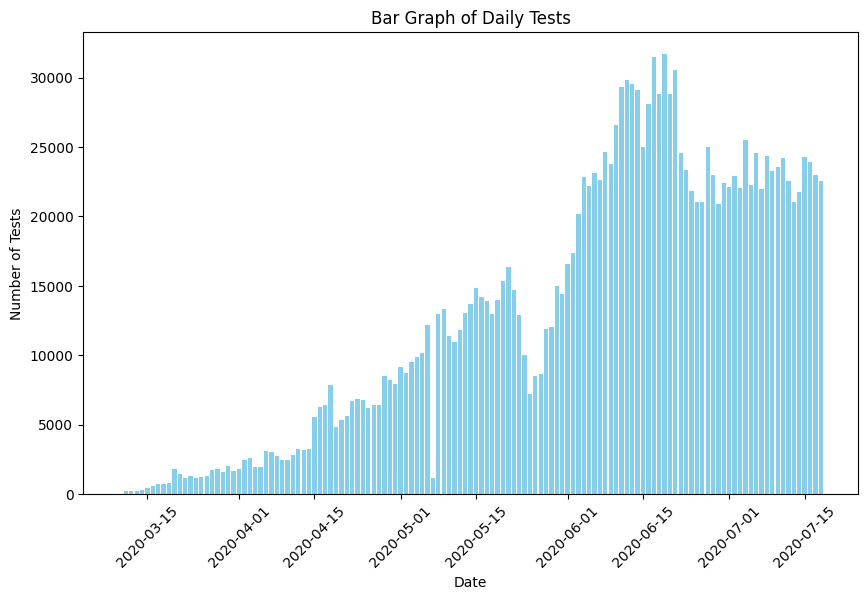

In [39]:
plt.figure(figsize=(10, 6))
plt.bar(df['Date'], df['Daily Tests'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Bar Graph of Daily Tests')
plt.xticks(rotation=45)
plt.show()

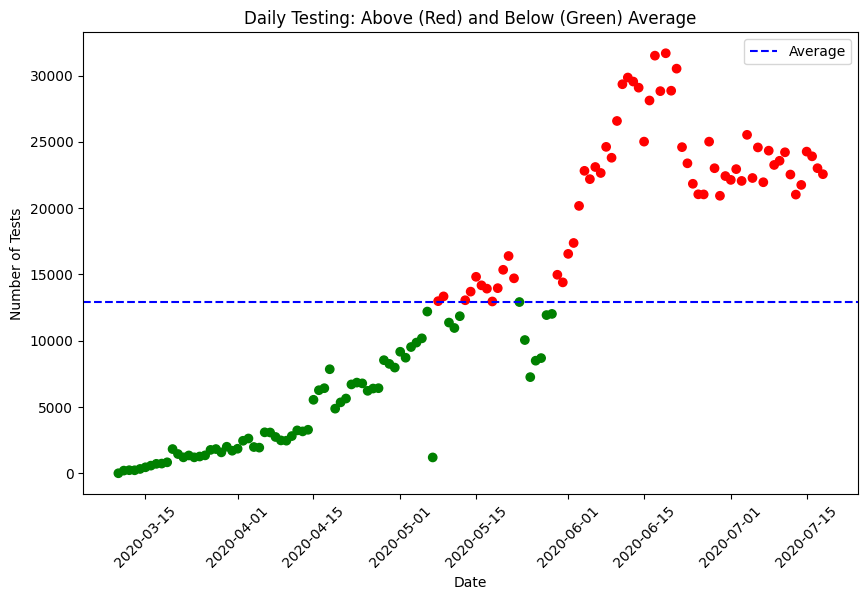

In [40]:
avg_tests = df['Daily Tests'].mean()
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Daily Tests'], color=['red' if x > avg_tests else 'green' for x in df['Daily Tests']])
plt.axhline(y=avg_tests, color='blue', linestyle='--', label='Average')
plt.xlabel('Date')
plt.ylabel('Number of Tests')
plt.title('Daily Testing: Above (Red) and Below (Green) Average')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [41]:
df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)

weekly_data = df.resample('W').sum()
print("Weekly Data:")
print(weekly_data)

monthly_data = df.resample('M').sum()
print("Monthly Data:")
print(monthly_data)

Weekly Data:
            Daily Tests  Daily Cases  Daily Recoveries  Daily Deaths
Date                                                                
2020-03-15       1430.0         35.0               3.0           0.0
2020-03-22       7315.0        750.0               3.0           6.0
2020-03-29      10318.0        822.0              26.0          12.0
2020-04-05      14533.0       1662.0             225.0          32.0
2020-04-12      19874.0       2087.0             838.0          43.0
2020-04-19      37377.0       3046.0             875.0          83.0
2020-04-26      43912.0       4908.0            1059.0         105.0
2020-05-03      58569.0       6858.0            2561.0         181.0
2020-05-10      71114.0      10755.0            2622.0         206.0
2020-05-17      92474.0      11179.0            3710.0         235.0
2020-05-24      96321.0      14224.0            5560.0         264.0
2020-05-31      77751.0      16111.0            8601.0         376.0
2020-06-07     144832

C:\Users\Umer Imtiaz\AppData\Local\Temp\ipykernel_5192\3842490374.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df.resample('M').sum()


In [42]:
weekly_data.to_excel('Weekly_COVID19_Stats.xlsx')
monthly_data.to_excel('Monthly_COVID19_Stats.xlsx')

In [43]:
weekly_max = weekly_data.max()
weekly_min = weekly_data.min()

print("\nWeekly Max Values:")
print(weekly_max)

print("\nWeekly Min Values:")
print(weekly_min)

monthly_max = monthly_data.max()
monthly_min = monthly_data.min()

print("\nMonthly Max Values:")
print(monthly_max)

print("\nMonthly Min Values:")
print(monthly_min)


Weekly Max Values:
Daily Tests         204512.0
Daily Cases          40807.0
Daily Recoveries     42359.0
Daily Deaths           862.0
dtype: float64

Weekly Min Values:
Daily Tests         1430.0
Daily Cases           35.0
Daily Recoveries       3.0
Daily Deaths           0.0
dtype: float64

Monthly Max Values:
Daily Tests         745419.0
Daily Cases         141010.0
Daily Recoveries    103474.0
Daily Deaths          2852.0
dtype: float64

Monthly Min Values:
Daily Tests         22763.0
Daily Cases          2021.0
Daily Recoveries       82.0
Daily Deaths           26.0
dtype: float64


In [44]:
population = 220000000  # Approximate population of Pakistan for the analysis

# Calculating per thousand and per million statistics
df['Tests per Thousand'] = (df['Daily Tests'] / population) * 1000
df['Cases per Thousand'] = (df['Daily Cases'] / population) * 1000
df['Deaths per Million'] = (df['Daily Deaths'] / population) * 1000000
df['Recoveries per Thousand'] = (df['Daily Recoveries'] / population) * 1000

# Displaying the calculated columns
print(df[['Tests per Thousand', 'Cases per Thousand', 'Deaths per Million', 'Recoveries per Thousand']].head())

            Tests per Thousand  Cases per Thousand  Deaths per Million  \
Date                                                                     
2020-03-10            0.000000            0.000005                 0.0   
2020-03-11            0.000909            0.000005                 0.0   
2020-03-12            0.001045            0.000005                 0.0   
2020-03-13            0.001023            0.000032                 0.0   
2020-03-14            0.001477            0.000014                 0.0   

            Recoveries per Thousand  
Date                                 
2020-03-10                 0.000005  
2020-03-11                 0.000005  
2020-03-12                 0.000000  
2020-03-13                 0.000005  
2020-03-14                 0.000000  


In [45]:
df['Days'] = (df.index - df.index[0]).days
X = df[['Days']]
y_cases = df['Daily Cases']
y_deaths = df['Daily Deaths']

In [46]:
X_train, X_test, y_train_cases, y_test_cases = train_test_split(X, y_cases, test_size=0.2, random_state=42)
X_train, X_test, y_train_deaths, y_test_deaths = train_test_split(X, y_deaths, test_size=0.2, random_state=42)

In [47]:
model_cases = LinearRegression()
model_cases.fit(X_train, y_train_cases)
y_pred_cases = model_cases.predict(X_test)

In [48]:
model_deaths = LinearRegression()
model_deaths.fit(X_train, y_train_deaths)
y_pred_deaths = model_deaths.predict(X_test)

In [49]:
print("Mean Squared Error for Daily Cases Prediction:", mean_squared_error(y_test_cases, y_pred_cases))
print("Mean Squared Error for Daily Deaths Prediction:", mean_squared_error(y_test_deaths, y_pred_deaths))

Mean Squared Error for Daily Cases Prediction: 1538059.8627251575
Mean Squared Error for Daily Deaths Prediction: 527.8298228550557
